# Exploraroty Work On School Ratings

In [1]:
# The following routine combines all data: school, flood, crime, HCAD into one dataframe
# It also explores the impact of school rating in the different variables
# The ouput is the dataframe to be used in the final routine

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import numpy as np
import seaborn as sns


from config import gkey
gmaps.configure(api_key=gkey)

### Import Data File With Inner Loop Parameters

In [3]:
# read file with school, flood, and crime data and make it into a dataframe
file1 = pd.read_csv("Resources/combined_flood_crime_and_school_data.csv")
data = pd.DataFrame(file1)
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Address', 'Latitude', 'Longitude',
       'Flood Description', 'Flood Zone', 'Flood Risk', 'SITE_ADDR_1',
       'ACCOUNT', 'SITE_ADDR_3', 'NEIGHBORHOOD_CODE', 'NEIGHBORHOOD_GROUP',
       'TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA', 'ACREAGE', 'LAND_VALUE_2019',
       'TOTAL_APPRAISED_VALUE_2019', 'TOTAL_MARKET_VALUE_2019',
       'LAND_VALUE_2018', 'TOTAL_APPRAISED_VALUE_2018',
       'TOTAL_MARKET_VALUE_2018', 'pct_change_land_value_2018_2019',
       'pct_change_total_appraised_value_2018_2019',
       'pct_change_total_market_value_2018_2019', 'SQ_FT', 'NEIGHBORHOOD',
       'Offense Count', 'crime_rank', 'Elementary Public School ID',
       'Elementary Public School Name', 'Elementary Public School Rating',
       'Elementary Charter School ID', 'Elementary Charter School Name',
       'Elementary Charter School Rating', 'Public Middle School ID',
       'Public Middle School Name', 'Public Middle School Rating',
       'Charter Middle School 

In [4]:
# scale the school ratings between min and max to highlight the difference in the heat map
data['Scaled School Rating'] = (data['Average School Rating']-(data['Average School Rating'].min()))
data['Scaled School Rating'].describe()

count    26253.000000
mean        11.674856
std          4.072523
min          0.000000
25%         10.000000
50%         11.666667
75%         15.000000
max         18.333333
Name: Scaled School Rating, dtype: float64

In [5]:
# Flood risk had been inverted in the input dataframe to highlight low flood risk as positive
# here i am reverting the flook risk to its original form before plotting it in a heat map
data['Flood Risk'] = 1/data['Flood Risk']

In [6]:
#cleaning unwanted columnns from DataFrame
del data['Unnamed: 0']
del data['Unnamed: 0.1']

data.rename(columns={'SITE_ADDR_3':"Zip Code"}, inplace = True)
data.columns

Index(['Address', 'Latitude', 'Longitude', 'Flood Description', 'Flood Zone',
       'Flood Risk', 'SITE_ADDR_1', 'ACCOUNT', 'Zip Code', 'NEIGHBORHOOD_CODE',
       'NEIGHBORHOOD_GROUP', 'TOTAL_BUILDING_AREA', 'TOTAL_LAND_AREA',
       'ACREAGE', 'LAND_VALUE_2019', 'TOTAL_APPRAISED_VALUE_2019',
       'TOTAL_MARKET_VALUE_2019', 'LAND_VALUE_2018',
       'TOTAL_APPRAISED_VALUE_2018', 'TOTAL_MARKET_VALUE_2018',
       'pct_change_land_value_2018_2019',
       'pct_change_total_appraised_value_2018_2019',
       'pct_change_total_market_value_2018_2019', 'SQ_FT', 'NEIGHBORHOOD',
       'Offense Count', 'crime_rank', 'Elementary Public School ID',
       'Elementary Public School Name', 'Elementary Public School Rating',
       'Elementary Charter School ID', 'Elementary Charter School Name',
       'Elementary Charter School Rating', 'Public Middle School ID',
       'Public Middle School Name', 'Public Middle School Rating',
       'Charter Middle School ID', 'Charter Middle School Name'

### Compare School Ratings Vs. Total Appraised Value

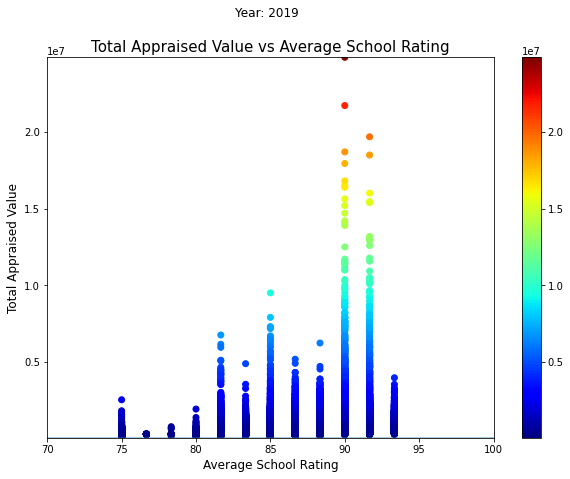

In [7]:
# plot average school ratings vs total appraised values in 2019
fig1,ax = plt.subplots(figsize=(10,7))
chart1 = ax.scatter(
    data['Average School Rating'],data["TOTAL_APPRAISED_VALUE_2019"],c=data["TOTAL_APPRAISED_VALUE_2019"],
    cmap=plt.cm.jet)
fig1.colorbar(chart1, ax=ax)
plt.plot(data['Average School Rating'])
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Rating", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(data["TOTAL_APPRAISED_VALUE_2019"].min(),data["TOTAL_APPRAISED_VALUE_2019"].max())
plt.show()
fig1.savefig("Output/appraised_value_vs_average_school_ratings.png")

### Evaluate Trends In All Schools In Harris County, TX

In [8]:
# import data for school in all of Harris County
file3 = pd.read_csv("Resources/Schools_Ratings_Harris_Co.csv")
df3 = pd.DataFrame(file3)
df3.head()

,Unnamed: 0,School.ID,School.Name,Street.Address,CITY,ZIP,County,District.Name,School.Type,Charter.Trad,...,Math.Current-2,Math.Change,Student.Growth.Reading,Student.Growth.Math,School.Program,Community.Resources,longitude,latitude,Student.Teacher.Ratio,Grade.Range
0,23,101871041,A+ UNLIMITED POTENTIAL MIDDLE,5100 MONTROSE,HOUSTON,77006.0,HARRIS,A+ UNLIMITED POTENTIAL,Middle,Charter,...,NaN,NaN,MEDIUM,LOW,NaN,NaN,-95.391398,29.727426,22.0,06—08
1,43,101810002,ACADEMY OF ACCELERATED LEARNING ELEMENTARY,6711 BELLFORT ST,HOUSTON,77087.0,HARRIS,ACADEMY OF ACCELERATED LEARNING INC,Elementary,Charter,...,31.720430,VARIED,HIGH,HIGH,(Unavailable),9999,-95.311151,29.668447,17.0,PK—05
2,48,101849101,ACCELERATED INTERDISCIPLINARY ACADEMY ELEMENTARY,12825 SUMMIT RIDGE DR,HOUSTON,77085.0,HARRIS,ACCELERATED INTERMEDIATE ACADEMY,Elementary,Charter,...,52.631579,INCREASED,HIGH,HIGH,(Unavailable),9999,-95.484785,29.636619,14.0,PK—06
3,56,101907107,ADAM ELEMENTARY,11303 HONEYGROVE LN,HOUSTON,77065.0,HARRIS,CYPRESS-FAIRBANKS ISD,Elementary,Traditional Public School,...,49.612403,VARIED,MEDIUM,MEDIUM,NaN,NaN,-95.603242,29.926556,16.0,PK—05
4,81,101905043,AGUIRRE JUNIOR HIGH,15726 WALLISVILLE RD,HOUSTON,77049.0,HARRIS,CHANNELVIEW ISD,Middle,Traditional Public School,...,32.142857,INCREASED,HIGH,MEDIUM,NaN,NaN,-95.156563,29.809586,18.0,06—08


In [9]:
# Convert ratings to numbers
df3["School Rating"] = ""
df3.loc[df3["TEA Grade"]=="A", "School Rating"]=95
df3.loc[df3["TEA Grade"]=="B", "School Rating"]=85
df3.loc[df3["TEA Grade"]=="C", "School Rating"]=75
df3.loc[df3["TEA Grade"]=="D", "School Rating"]=65
df3.loc[df3["TEA Grade"]=="F", "School Rating"]=55

In [10]:
# create a heat map of school rantings for all of Harris County
locations_2 = df3[["latitude","longitude"]]
county_ratings = df3["School Rating"]

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig2 = gmaps.figure(layout=figure_layout)
county_layer = gmaps.heatmap_layer(locations_2,weights=county_ratings,dissipating=False)
fig2.add_layer(county_layer)
fig2

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [11]:
county_layer.max_intensity = 94
county_layer.min_intensity = 55
county_layer.point_radius = 0.005

### Evaluate Trends In All Schools Within Inner Loop Subset

In [12]:
# create a heat map of all school rantings 
locations = data[["Latitude","Longitude"]]
school_ratings = data['Scaled School Rating']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig3 = gmaps.figure(layout=figure_layout)
school_layer = gmaps.heatmap_layer(locations,weights=school_ratings,dissipating=False)
fig3.add_layer(school_layer)
fig3

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [13]:
school_layer.max_intensity = max(data['Scaled School Rating'])
school_layer.point_radius = 0.0003

### All Schools By Zip Codes

In [14]:
# group all schools by zip code
zip_code = data[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
zip_code_group = zip_code.groupby(["Zip Code"]).mean()
zip_code_group

,Average School Rating,TOTAL_APPRAISED_VALUE_2019
Zip Code,,
77002,79.835165,4.197050e+05
77005,88.456192,1.218452e+06
77006,82.888377,6.906972e+05
77019,84.269200,1.379320e+06
77025,86.513661,5.169472e+05
77027,91.829155,1.117943e+06
77030,86.408314,8.137538e+05
77054,81.176674,2.774074e+05
77098,83.674224,7.560493e+05


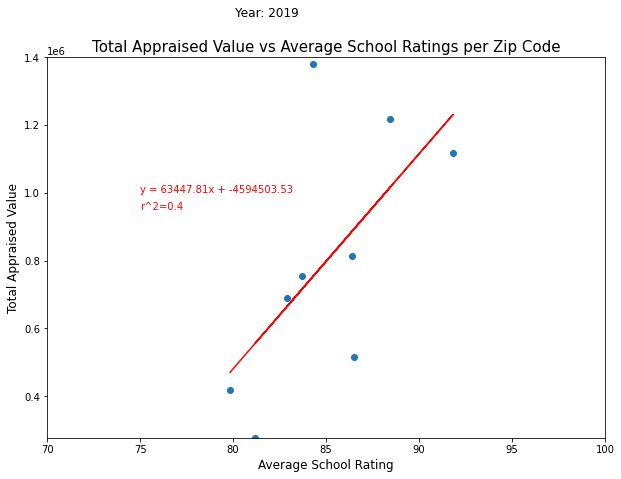

In [15]:
# plot average school ratings vs total appraised values and add a linear regression
correlation = st.pearsonr(zip_code_group["Average School Rating"],zip_code_group["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_code_group["Average School Rating"],
                                                           zip_code_group["TOTAL_APPRAISED_VALUE_2019"])
regress_values = zip_code_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig4,ax = plt.subplots(figsize=(10,7))
chart4 = ax.scatter(zip_code_group['Average School Rating'],zip_code_group["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(zip_code_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(zip_code_group["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig4.savefig("Output/appraised_value_vs_average_school_ratings_all schools_inner_loop.png")

### Public Schools Inner Loop Subset

In [16]:
# slice the data for public schools
public_schools = data[["Elementary Public School Rating","Public Middle School Rating","Public High School Rating",
                       'TOTAL_APPRAISED_VALUE_2019','Zip Code',"NEIGHBORHOOD_GROUP"]]
public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",
                                                  "Public High School Rating"]].mean(axis=1)

<ipython-input-16-1502d1f94619>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",


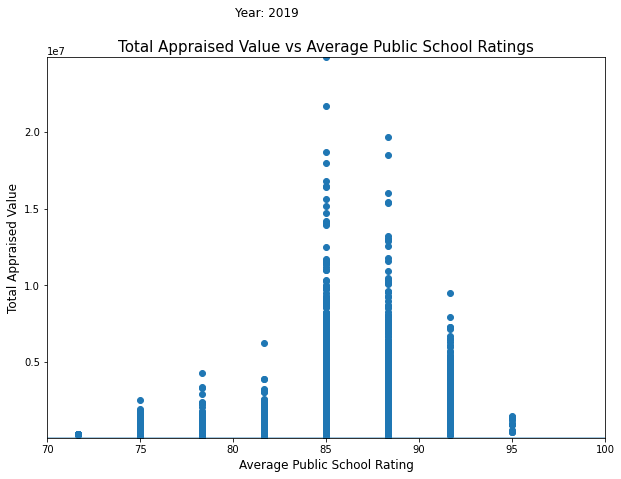

In [17]:
# plot average public school ratings vs appraised values
fig5,ax = plt.subplots(figsize=(10,7))
chart5 = ax.scatter(public_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(public_schools['Average School Rating'])
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools["TOTAL_APPRAISED_VALUE_2019"].min(),public_schools["TOTAL_APPRAISED_VALUE_2019"].max())
plt.show()
fig5.savefig("Output/appraised_value_vs_public_school_ratings_inner_loop.png")

### Charter Schools Inner Loop Subset

In [18]:
# slice the data for charter_schools
charter_schools = data[["Elementary Charter School Rating","Charter Middle School Rating","Charter High School Rating",
                       'TOTAL_APPRAISED_VALUE_2019','Zip Code',"NEIGHBORHOOD_GROUP"]]
charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",
                                                  "Charter High School Rating"]].mean(axis=1)

<ipython-input-18-5ef457ec7dcb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",


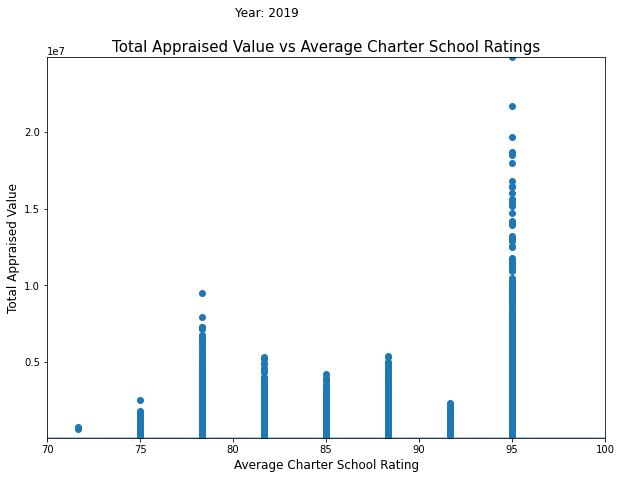

In [19]:
# plot average charter school ratings vs appraised values
fig6,ax = plt.subplots(figsize=(10,7))
chart6 = ax.scatter(charter_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(charter_schools['Average School Rating'])
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools["TOTAL_APPRAISED_VALUE_2019"].min(),charter_schools["TOTAL_APPRAISED_VALUE_2019"].max())
plt.show()
fig6.savefig("Output/appraised_value_vs_charter_school_ratings_inner_loop.png")

### Public Schools By Zip Codes

In [20]:
# group public schools by zip code
public_zip_code = public_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
public_schools_group = public_zip_code.groupby(["Zip Code"]).mean()
public_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE_2019
Zip Code,,
77002,83.681319,4.197050e+05
77005,89.137297,1.218452e+06
77006,83.826237,6.906972e+05
77019,82.245007,1.379320e+06
77025,85.932787,5.169472e+05
77027,88.658310,1.117943e+06
77030,91.149961,8.137538e+05
77054,80.672878,2.774074e+05
77098,82.727931,7.560493e+05


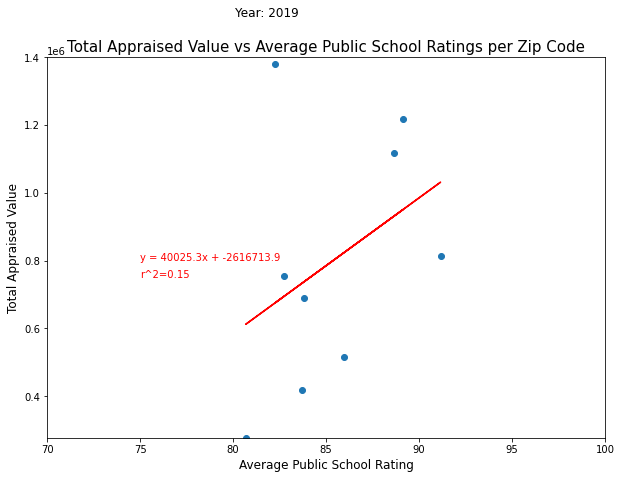

In [21]:
# plot average public school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(public_schools_group["Average School Rating"],public_schools_group["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_schools_group["Average School Rating"],
                                                           public_schools_group["TOTAL_APPRAISED_VALUE_2019"])
regress_values = public_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig7,ax = plt.subplots(figsize=(10,7))
chart7 = ax.scatter(public_schools_group['Average School Rating'],public_schools_group["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(public_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,0.8e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.75e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools_group["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig7.savefig("Output/appraised_value_vs_public_school_ratings_groupedby_zipcode.png")

### Charter Schools By Zip Codes

In [22]:
# group charter schools by zip code
charter_zip_code = charter_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
charter_schools_group = charter_zip_code.groupby(["Zip Code"]).mean()
charter_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE_2019
Zip Code,,
77002,75.989011,4.197050e+05
77005,87.775087,1.218452e+06
77006,81.950518,6.906972e+05
77019,86.293392,1.379320e+06
77025,87.094536,5.169472e+05
77027,95.000000,1.117943e+06
77030,81.666667,8.137538e+05
77054,81.680469,2.774074e+05
77098,84.620518,7.560493e+05


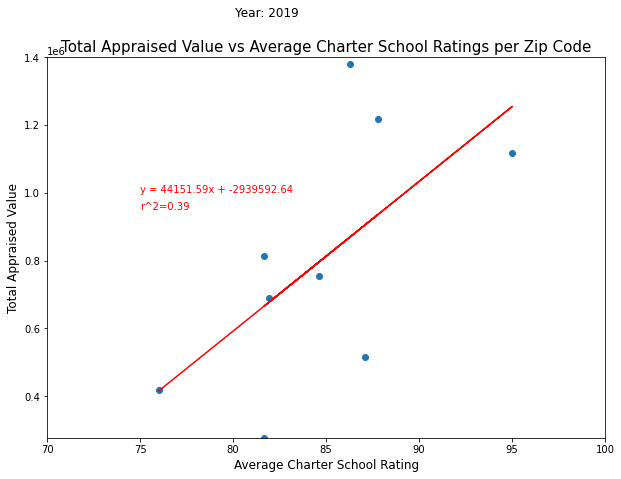

In [23]:
# plot average charter school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(charter_schools_group["Average School Rating"],charter_schools_group["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_schools_group["Average School Rating"],
                                                           charter_schools_group["TOTAL_APPRAISED_VALUE_2019"])
regress_values = charter_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig8,ax = plt.subplots(figsize=(10,7))
chart8 = ax.scatter(charter_schools_group['Average School Rating'],charter_schools_group["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(charter_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools_group["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig8.savefig("Output/appraised_value_vs_charter_school_ratings_groupedby_zipcode.png")

### Schools By Neighborhood Group

In [24]:
# slice data by neighborhood group
neighborhood = data[['NEIGHBORHOOD_GROUP',"Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
neighborhood_grouped = neighborhood.groupby(['NEIGHBORHOOD_GROUP']).mean()
neighborhood_grouped.head()

,Average School Rating,TOTAL_APPRAISED_VALUE_2019
NEIGHBORHOOD_GROUP,,
1200.0,85.439068,5.878459e+05
1201.0,83.750000,5.092439e+06
1202.0,82.737226,2.027609e+06
1203.0,83.740280,1.133553e+06
1204.0,82.790055,7.834188e+05


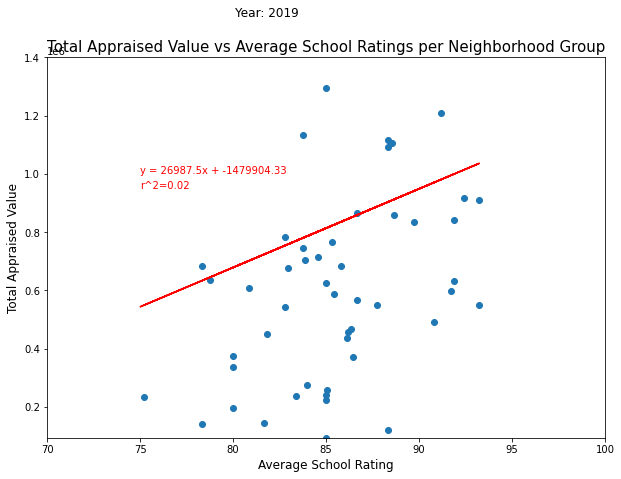

In [25]:
# plot average school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(neighborhood_grouped["Average School Rating"],neighborhood_grouped["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(neighborhood_grouped["Average School Rating"],
                                                           neighborhood_grouped["TOTAL_APPRAISED_VALUE_2019"])
regress_values = neighborhood_grouped["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(neighborhood_grouped['Average School Rating'],neighborhood_grouped["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(neighborhood_grouped['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(neighborhood_grouped["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig9.savefig("Output/appraised_value_vs_school_ratings_groupedby_neighborhood.png")

### Public Schools By Neighborhood Group

In [26]:
# group public schools by neighborhood group
public_neighborhood = public_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
public_neighborhood_group = public_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()

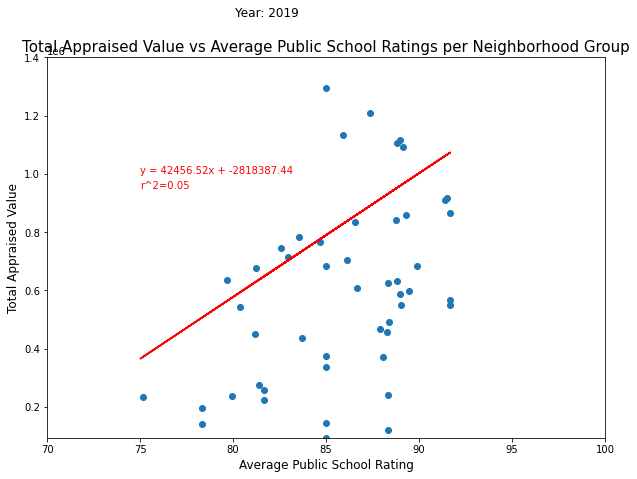

In [27]:
# plot average public school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(public_neighborhood_group["Average School Rating"],
                          public_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_neighborhood_group["Average School Rating"],
                                                           public_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
regress_values = public_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig10,ax = plt.subplots(figsize=(10,7))
chart10 = ax.scatter(public_neighborhood_group['Average School Rating'],public_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(public_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig10.savefig("Output/appraised_value_vs_public_school_ratings_groupedby_neighborhood.png")

### Charter Schools By Neighborhood Group

In [28]:
# group charter schools by neighborhood group
charter_neighborhood = charter_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE_2019']]
charter_neighborhood_group = charter_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()
charter_neighborhood_group.head()

,Average School Rating,TOTAL_APPRAISED_VALUE_2019
NEIGHBORHOOD_GROUP,,
1200.0,81.917563,5.878459e+05
1201.0,78.333333,5.092439e+06
1202.0,78.795620,2.027609e+06
1203.0,81.581130,1.133553e+06
1204.0,82.016575,7.834188e+05


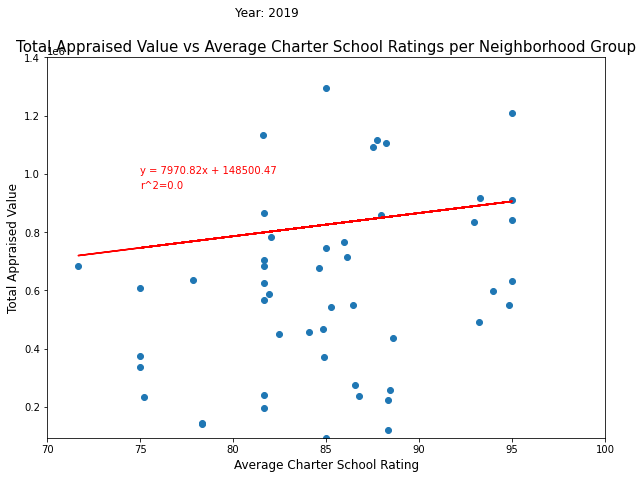

In [29]:
# plot average charter school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(charter_neighborhood_group["Average School Rating"],
                          charter_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_neighborhood_group["Average School Rating"],
                                                           charter_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
regress_values = charter_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
fig11,ax = plt.subplots(figsize=(10,7))
chart11 = ax.scatter(charter_neighborhood_group['Average School Rating'],charter_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"])
plt.plot(charter_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.annotate(f'r^2={round(correlation[0]**2,2)}',(75,.95e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_neighborhood_group["TOTAL_APPRAISED_VALUE_2019"].min(),1.4e6)
plt.show()
fig11.savefig("Output/appraised_value_vs_charter_school_ratings_groupedby_neighborhood.png")

##  Remove Charter Schools From the Final Data

In [30]:
# As charter schools are not restricted by zoning, we decided to remove charter schools from our evaluation
# create a dataset without charter schools
only_public_schools = data.drop(['Elementary Charter School ID','Elementary Charter School Name',
                                 'Elementary Charter School Rating','Charter Middle School ID',
                                 'Charter Middle School Name', 'Charter Middle School Rating',
                                 'Charter High School ID','Charter High School Name',
                                 'Charter High School Rating'], axis=1)

value_2019 = only_public_schools['TOTAL_APPRAISED_VALUE_2019']
value_2018 = only_public_schools['TOTAL_APPRAISED_VALUE_2018']
only_public_schools["pct_change"] = (value_2019-value_2018)/value_2018*100
only_public_schools.to_csv("Output/combined_data_without_charter_schools.csv",index=False)

# Create Heatmaps Of Key Parameters

In [31]:
# group the data by zipcode
homes_less_1M = data.loc[data['TOTAL_APPRAISED_VALUE_2019']<1000000,:]
zipcode_data = homes_less_1M.groupby(['Zip Code']).mean()
zipcode_data

,Latitude,Longitude,Flood Risk,ACCOUNT,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,ACREAGE,LAND_VALUE_2019,...,Public Middle School ID,Public Middle School Rating,Charter Middle School ID,Charter Middle School Rating,Public High School ID,Public High School Rating,Charter High School ID,Charter High School Rating,Average School Rating,Scaled School Rating
Zip Code,,,,,,,,,,,,,,,,,,,,,
77002,29.746432,-95.374778,0.983516,9.762151e+11,8022.989560,1387.131868,2386.373626,2513.868132,2513.868132,149227.978022,...,1.019123e+08,82.362637,1.032830e+08,68.626374,1.019122e+08,94.560440,1.019072e+08,94.230769,79.835165,4.835165
77005,29.719032,-95.430388,0.670755,6.515574e+11,7439.809824,1215.654292,2334.817037,5254.008949,5254.008949,541344.111037,...,1.019122e+08,87.174345,1.018621e+08,88.573086,1.019120e+08,87.853828,1.019123e+08,95.000000,88.794056,13.794056
77006,29.744871,-95.392941,1.000000,6.217669e+11,8209.908244,1574.610747,2281.498034,3547.487549,3547.487549,296799.629096,...,1.019122e+08,77.621232,1.019033e+08,86.638270,1.019124e+08,95.000000,1.019123e+08,95.000000,82.868065,7.868065
77019,29.753175,-95.397253,0.992989,8.989595e+11,8317.282066,1626.622023,2407.977111,2763.321373,2763.321373,203181.039592,...,1.019122e+08,73.935973,1.019121e+08,84.440148,1.019122e+08,92.432725,1.019864e+08,95.000000,81.981648,6.981648
77025,29.686115,-95.435031,0.534787,8.943720e+11,7454.096278,1226.071047,2287.752071,6895.237806,6895.237806,257678.598380,...,1.019121e+08,85.009203,1.018460e+08,90.731640,1.019120e+08,87.992822,1.018561e+08,95.000000,86.267256,11.267256
77027,29.739152,-95.448865,0.995140,9.045425e+11,8317.511339,1638.913188,2567.206759,5574.463883,5574.463883,403178.990060,...,1.019123e+08,91.693174,1.018327e+08,95.000000,1.019120e+08,85.000000,1.019123e+08,95.000000,91.926220,16.926220
77030,29.707900,-95.409953,0.471408,7.206749e+11,7446.114120,1208.584311,2565.630499,6231.847507,6231.847507,472564.397361,...,1.019121e+08,84.904692,1.018678e+08,75.000000,1.019120e+08,95.000000,1.018957e+08,95.000000,86.454057,11.454057
77054,29.681172,-95.405175,1.000000,1.244276e+12,7529.870497,1223.480331,1949.370600,1613.451346,1613.451346,86278.633540,...,1.019121e+08,81.728778,1.018462e+08,75.041408,1.019121e+08,91.563147,1.018659e+08,95.000000,81.176674,6.176674
77098,29.735054,-95.411417,1.000000,7.495240e+11,8123.456256,1535.200000,2398.750000,4205.142262,4205.142262,343028.729762,...,1.019123e+08,75.000000,1.019112e+08,94.571429,1.019120e+08,85.696429,1.019123e+08,95.000000,83.703373,8.703373


In [32]:
# create a heatmap of crime per zipcode 
locations_3 = zipcode_data[["Latitude","Longitude"]]
crime = zipcode_data['Offense Count']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig12 = gmaps.figure(layout=figure_layout)
crime_layer = gmaps.heatmap_layer(locations_3,weights=crime,dissipating=False)
fig12.add_layer(crime_layer)
crime_layer.max_intensity = max(zipcode_data['Offense Count'])
crime_layer.point_radius = 0.009
fig12

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [33]:
# create a heatmap of flood risk per zipcode 
locations_4 = zipcode_data[["Latitude","Longitude"]]
flood = zipcode_data['Flood Risk']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig13 = gmaps.figure(layout=figure_layout)
flood_layer = gmaps.heatmap_layer(locations_4,weights=flood,dissipating=False)
fig13.add_layer(flood_layer)
flood_layer.max_intensity = max(zipcode_data['Flood Risk'])
flood_layer.point_radius = 0.009
fig13

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [34]:
# create a heatmap of flood risk per residence
locations_5 = homes_less_1M[["Latitude","Longitude"]]
flood_residence = homes_less_1M['Flood Risk']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig14 = gmaps.figure(layout=figure_layout)
flood_res_layer = gmaps.heatmap_layer(locations_5,weights=flood_residence,dissipating=False)
fig14.add_layer(flood_res_layer)
flood_res_layer.max_intensity = max(homes_less_1M['Flood Risk'])
flood_res_layer.point_radius = 0.0003
fig14

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [35]:
# create a heatmap of appraised value per residence less than 1 million dollars
locations_6 = homes_less_1M[["Latitude","Longitude"]]
appraised_value = homes_less_1M['TOTAL_APPRAISED_VALUE_2019']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig15 = gmaps.figure(layout=figure_layout)
ap_value_layer = gmaps.heatmap_layer(locations_6,weights=appraised_value,dissipating=False)
fig15.add_layer(ap_value_layer)
ap_value_layer.max_intensity = max(homes_less_1M['TOTAL_APPRAISED_VALUE_2019'])
ap_value_layer.point_radius = 0.0003
fig15

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [36]:
# create a heatmap of square footage per residence less than 1 million dollars
locations_7 = homes_less_1M[["Latitude","Longitude"]]
sq_ft = homes_less_1M['SQ_FT']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig16 = gmaps.figure(layout=figure_layout)
sq_ft_layer = gmaps.heatmap_layer(locations_7,weights=sq_ft,dissipating=False)
fig16.add_layer(sq_ft_layer)
sq_ft_layer.max_intensity = max(homes_less_1M['SQ_FT'])
sq_ft_layer.point_radius = 0.0004
fig16

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [37]:
# create a heatmap of accreage per residence less than 1 million dollars
locations_8 = homes_less_1M[["Latitude","Longitude"]]
acreage = homes_less_1M['ACREAGE']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig17 = gmaps.figure(layout=figure_layout)
acreage_layer = gmaps.heatmap_layer(locations_8,weights=acreage,dissipating=False)
fig17.add_layer(acreage_layer)
acreage_layer.max_intensity = max(homes_less_1M['ACREAGE'])
acreage_layer.point_radius = 0.0005
fig17

Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…

In [38]:
# create a heatmap of percent value change per residence less than 1 million dollars
# scale the pct change to avoid negative numbers as weights for the heatmap
homes_less_1M['pct_change_total_appraised_value_2018_2019'] = (homes_less_1M['pct_change_total_appraised_value_2018_2019']-\
                                                               (homes_less_1M['pct_change_total_appraised_value_2018_2019'].min()))

locations_9 = homes_less_1M[["Latitude","Longitude"]]
pct_change = homes_less_1M['pct_change_total_appraised_value_2018_2019']

figure_layout = {"width":"900px",
                 "height":"900px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig18 = gmaps.figure(layout=figure_layout)
pct_change_layer = gmaps.heatmap_layer(locations_9,weights=pct_change,dissipating=False)
fig18.add_layer(pct_change_layer)
pct_change_layer.max_intensity = max(homes_less_1M['pct_change_total_appraised_value_2018_2019'])
pct_change_layer.point_radius = 0.0005
fig18

<ipython-input-38-53f07a7675ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homes_less_1M['pct_change_total_appraised_value_2018_2019'] = (homes_less_1M['pct_change_total_appraised_value_2018_2019']-\


Figure(layout=FigureLayout(border='1px solic black', height='900px', margin='0 auto 0 auto', padding='1px', wi…